# 사전 학습된 CNN(VGG-16)을 이용한 Feature Extraction
- Dogs_and_Cats 데이터셋 이용(컬러, 이진분류)

## VGG-16 Model
- University of Oxford - Visual Geometry Group
- 2014 ILSVRC 2nd Model
- ImageNet Large Scale Visual Recognition Challenge (ILSVRC)

# Import Keras

In [ ]:
import keras
keras.__version__

'2.4.3'

# 1. Google Drive Mount

-  'dogs_and_cats_small.zip' 디렉토리를 구글드라이브에 업로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


> ## 1) 마운트 결과 확인

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar  4 04:51 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


> ## 2) Unzip 'dogs_and_cats_small.zip'

In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inf

In [ ]:
!ls -l

total 20
drwx------ 6 root root 4096 Mar 24 05:08 drive
drwxr-xr-x 1 root root 4096 Mar 18 13:36 sample_data
drwxr-xr-x 4 root root 4096 Mar 24 05:08 test
drwxr-xr-x 4 root root 4096 Mar 24 05:08 train
drwxr-xr-x 4 root root 4096 Mar 24 05:08 validation


# 2. Image_File Driectory Setting

- train_dir
- valid_dir
- test_dir

In [ ]:
train_dir = 'train'       # train 이미지 2000장은 train 디렉터리에 
valid_dir = 'validation'  # valid 이미지 1000장은 valid 디렉터리에
test_dir = 'test'         # test 이미지 1000장은 test 디렉터리에

# 3. Import VGG-16 Model



> ## 1) conv_base

In [ ]:
from keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet',        # imagenet 데이터셋에 적용됐던 모델
                  include_top = False,         # DNN부분(Classification)은 제외하고 가져온다
                  input_shape = (150, 150, 3)) # 내가 학습시킬 모델 Input_shape 

58892288/58889256 [==============================] - 0s 0us/step


> ## 2) Model Information

In [ ]:
conv_base.summary() # DNN파트(3층) 제외한 Layer 13개 가져옴

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# 4. Feature Extraction


> ## 1) 특징추출 함수 정의 : extract_feature( )

- conv_base.predict( )

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(rescale = 1./255)

batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count, 4, 4, 512))
    labels = np.zeros(shape = (sample_count))

    generator = datagen.flow_from_directory(directory,
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
           break
    return features, labels

> ## 2) 특징 추출 함수 적용

- train_dir
- valid_dir
- test_dir
<br><br>
- 약 1분

In [ ]:
%%time

train_features, train_labels = extract_features(train_dir, 2000) # 학습시킬 모델에 맞게 특징이 뽑힌다.
valid_features, valid_labels = extract_features(valid_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
CPU times: user 20.7 s, sys: 4.13 s, total: 24.8 s
Wall time: 52.9 s


In [ ]:
train_features.shape, valid_features.shape, test_features.shape

((2000, 4, 4, 512), (1000, 4, 4, 512), (1000, 4, 4, 512))

> ## 3) Reshape Features : 위 함수로 나온 feature map을 DNN에 넣기 위해 1차원으로 핀다.

- For 'Classification' Network

In [ ]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512)) 
valid_features = np.reshape(valid_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

# 5. Keras CNN Modeling with VGG-16 Featured Data



> ## 1) Model Define

- 'Classification' Network Only
- Dropout Layer

In [ ]:
# DNN 
from keras import models, layers
model = models.Sequential()                            
model.add(layers.Dense(units = 256, activation = 'relu', input_dim = 4 * 4* 512)) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

- 모델 학습방법 설정

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
# 이진분류

> ## 3) Model Fit

- 약 1분

In [ ]:
%%time

hist_dandc = model.fit(train_features, train_labels,        
                       epochs = 100,             
                       validation_data = (valid_features, valid_labels))   

Epoch 1/100
63/63 [==============================] - 1s 9ms/step - loss: 0.6199 - accuracy: 0.7300 - val_loss: 0.2790 - val_accuracy: 0.8880
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 0.2452 - accuracy: 0.8972 - val_loss: 0.2435 - val_accuracy: 0.9010
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 0.1871 - accuracy: 0.9209 - val_loss: 0.2468 - val_accuracy: 0.8980
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 0.1594 - accuracy: 0.9406 - val_loss: 0.2727 - val_accuracy: 0.8970
Epoch 5/100
63/63 [==============================] - 0s 4ms/step - loss: 0.1460 - accuracy: 0.9418 - val_loss: 0.3281 - val_accuracy: 0.8750
Epoch 6/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0995 - accuracy: 0.9663 - val_loss: 0.2542 - val_accuracy: 0.9030
Epoch 7/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0985 - accuracy: 0.9654 - val_loss: 0.2934 - val_accuracy: 0.8870
Epoch 8/100
6

> ## 4) 학습 결과 시각화 

- Loss Visualization

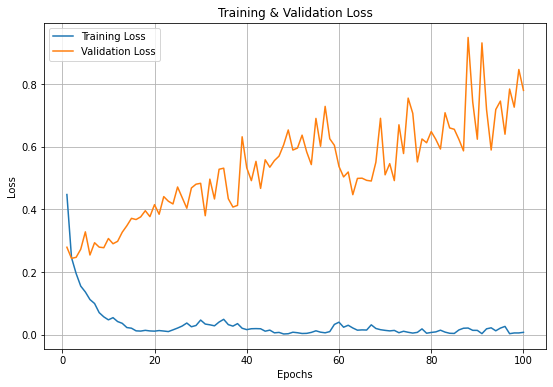

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_dandc.history['loss'])
plt.plot(epochs, hist_dandc.history['val_loss'])
plt.title('Training & Validation Loss')
# plt.ylim(0, 0.4)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()
# overfitting 경향이 있다. 

- Accuary Visualization

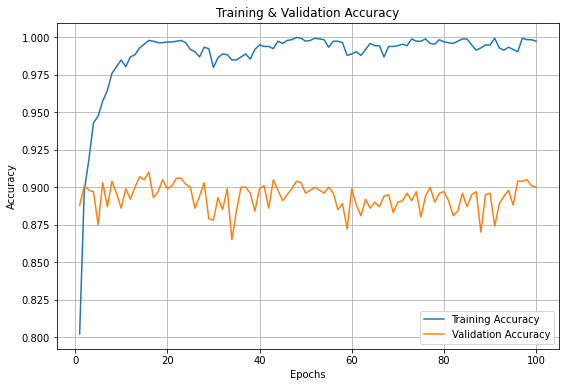

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_dandc.history['accuracy'])
plt.plot(epochs, hist_dandc.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
# plt.ylim(0, 0.4)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show() 

> ## 5) Model Evaluate : test data로 돌려보자

- Loss & Accuracy

In [ ]:
loss, accuracy = model.evaluate(test_features, test_labels)
                         
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# VGG-16 안 썼을 때, accuracy = 0.70700 // VGG-16 썼을 때, accuary = 0.88500
# VGG-16 안 썼을 때, loss = 3.46305 //  VGG-16 썼을 때, loss = 0.84489

32/32 [==============================] - 0s 2ms/step - loss: 0.8449 - accuracy: 0.8850
Loss = 0.84489
Accuracy = 0.88500


# 4. Model Save & Load to Google Drive

> ## 1) Google Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> ## 2) Model Save

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/models/004_dogs_and_cats_feature_extraction.h5')

In [ ]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 148902
-rw------- 1 root root  4353288 Mar 19 08:32 001_best_mnist.h5
-rw------- 1 root root    34592 Mar 17 07:32 001_model_iris.h5
drwx------ 2 root root     4096 Mar 19 08:32 002_best_mnist.h6
-rw------- 1 root root 41498896 Mar 23 02:27 002_dogs_and_cats_small.h5
drwx------ 2 root root     4096 Mar 19 08:33 003_best_mnist.h7
-rw------- 1 root root 41499744 Mar 23 06:23 003_dogs_and_cats_small.h5
-rw------- 1 root root 39879700 Mar 23 04:48 003_Logo_Data.h5
-rw------- 1 root root 25199032 Mar 24 05:15 004_dogs_and_cats_feature_extraction.h5


> ## 3) Model Load

In [ ]:
from keras.models import load_model
model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/004_dogs_and_cats_feature_extraction.h5')

In [ ]:
loss, accuracy = model.evaluate(test_features, test_labels)
                         
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))


32/32 [==============================] - 0s 2ms/step - loss: 0.8449 - accuracy: 0.8850
Loss = 0.84489
Accuracy = 0.88500


###
#The End
###